<a href="https://colab.research.google.com/github/marigflores/ai-studies/blob/main/machine_learning_classification_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prevendo a Ocorrência de Diabetes

## Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [ ]:
from google.colab import files
upload = files.upload()

Saving pima-data.csv to pima-data.csv


In [ ]:
# Importando os módulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


===Criando o gráfico (Identificando a correlação entre as variáveis / Correlação não implica causalidade ===

===Coeficiente de correlação: +1 = forte correlação positiva  0 = não há correlação  -1 = forte correlação negativa  ===


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


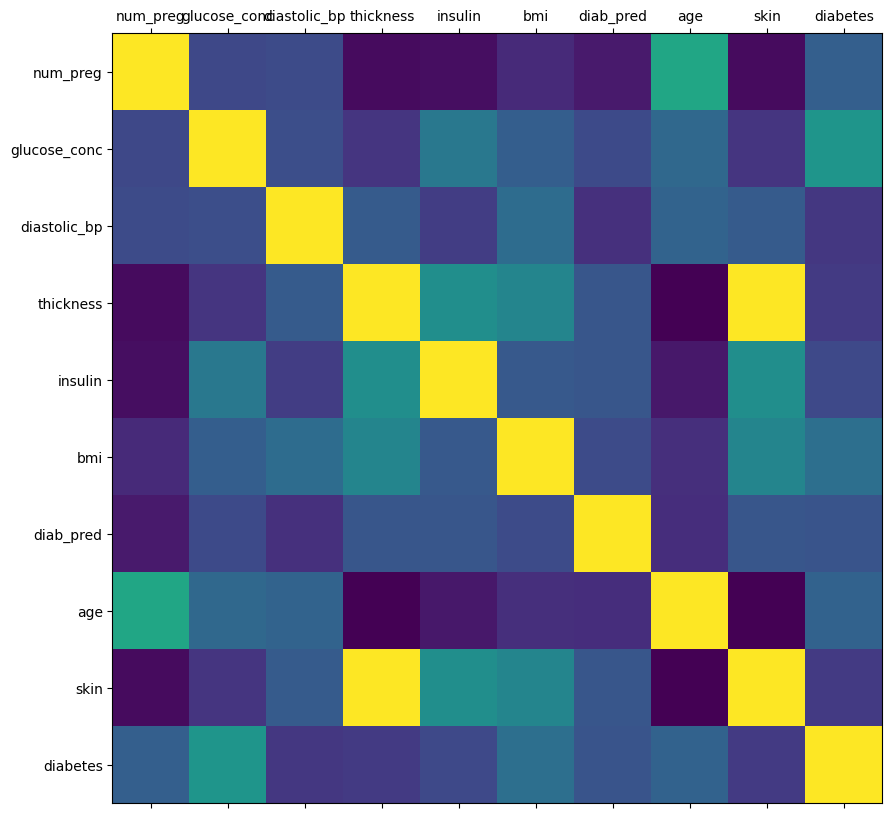

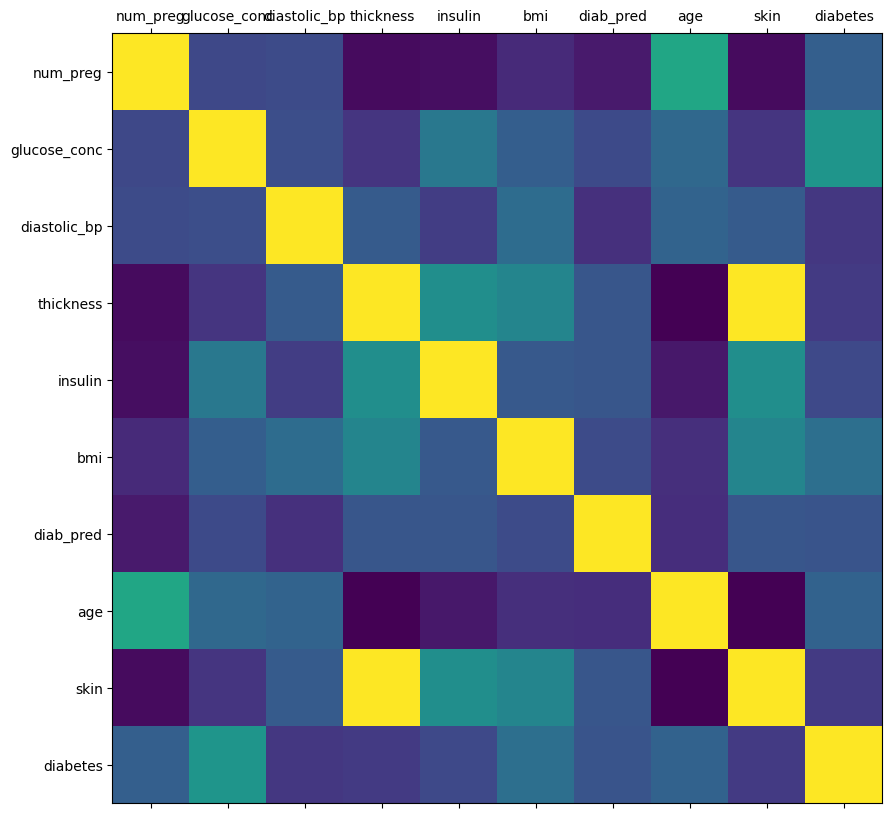

In [ ]:
#Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
# Carregando o dataset
df = pd.read_csv("pima-data.csv")

# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

# Criando o gráfico
print()
print("===Criando o gráfico (Identificando a correlação entre as variáveis / Correlação não implica causalidade ===")
plot_corr(df)

# Visualizando a correlação em tabela
# Coeficiente de correlação:
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
print()
print("===Coeficiente de correlação: +1 = forte correlação positiva  0 = não há correlação  -1 = forte correlação negativa  ===")
plot_corr(df)
df.corr()


In [ ]:
# Definindo as classes
diabetes_map = {True : 1, False : 0}

# Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

# Verificando como os dados estão distribuídos
print()
print("===Verificando como os dados estão distribuídos===")
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))


===Verificando como os dados estão distribuídos===
Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


## Spliting

70% para dados de treino e 30% para dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

# Variável a ser prevista
atrib_prev = ['diabetes']

# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

# Definindo a taxa de split
split_test_size = 0.30

# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

X_treino


69.92% nos dados de treino
30.08% nos dados de teste


array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

## Construindo e treinando o modelo

In [ ]:
#Versão do modelo usando Neural Networks MLPClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
modelo_v7 = MLPClassifier(random_state=42)
modelo_v7.fit(X_treino, Y_treino.ravel())
mlp_predict_train = modelo_v7.predict(X_treino)
mlp_predict_test = modelo_v7.predict(X_teste)

print("==================================================================================")
print("Exatidão (Accuracy) com os dados de treino do modelo MLPClassifier : {0:.4f}".format(metrics.accuracy_score(Y_treino, mlp_predict_train)))
print("Exatidão (Accuracy) com os dados de teste do modelo MLPClassifier: {0:.4f}".format(metrics.accuracy_score(Y_teste, mlp_predict_test)))
print()
print("Confusion Matrix - Modelo MLPClassifier")
print("{0}".format(metrics.confusion_matrix(Y_teste, mlp_predict_test, labels = [1, 0])))
print()
print("Classification Report MLPClassifier")
print(metrics.classification_report(Y_teste, mlp_predict_test, labels = [1, 0]))
print("==================================================================================")



Exatidão (Accuracy) com os dados de treino do modelo MLPClassifier : 0.7914
Exatidão (Accuracy) com os dados de teste do modelo MLPClassifier: 0.7229

Confusion Matrix - Modelo MLPClassifier
[[ 44  36]
 [ 28 123]]

Classification Report MLPClassifier
              precision    recall  f1-score   support

           1       0.61      0.55      0.58        80
           0       0.77      0.81      0.79       151

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



# Fim